In [1]:
import pandas as pd

eeg_file = "data/Rubert_14_may/Rubert_ojo_dcho_1/EEG.csv"

df = pd.read_csv(eeg_file)
df.head()

,timestamp,sequence,battery,flags,EEG-ch1,EEG-ch2,EEG-ch3,EEG-ch4,EEG-ch5,EEG-ch6,EEG-ch7,EEG-ch8,EEG-ch9,EEG-ch10,EEG-ch11,EEG-ch12,EEG-ch13,EEG-ch14,EEG-ch15,EEG-ch16
0,153315807427,9024,-2,0,441.699562,-2881.687806,31461.064595,2220.178801,23541.487931,13593.349357,23266.570989,31414.547490,-8744.120639,-2403.047116,20638.579662,13906.631047,-15575.661852,19306.168189,-10552.045703,13097.077674
1,153315807427,9024,-2,0,451.105192,-2882.515210,31464.191693,2222.928700,23541.865130,13589.796389,23266.339803,31414.510987,-8747.953463,-2409.909697,20633.712583,13909.429617,-15577.742528,19304.598556,-10557.156136,13092.575626
2,153315807427,9024,-2,0,446.822163,-2883.464290,31462.828911,2224.729519,23541.074230,13586.413769,23265.780089,31413.476732,-8749.742115,-2413.474833,20633.907266,13909.028083,-15576.866454,19302.931581,-10559.285483,13091.176341
3,153315807427,9024,-2,0,438.499458,-2884.097010,31460.310198,2222.003955,23542.424844,13585.598534,23266.169455,31411.590739,-8748.415836,-2411.722684,20634.941520,13904.927569,-15573.739356,19305.900500,-10555.951534,13093.804564
4,153315807427,9024,-2,0,433.960907,-2882.734228,31461.806824,2220.738515,23543.726787,13589.163669,23266.923852,31412.199124,-8744.777694,-2407.451823,20637.253383,13902.372353,-15569.602339,19309.441299,-10554.296727,13098.476959


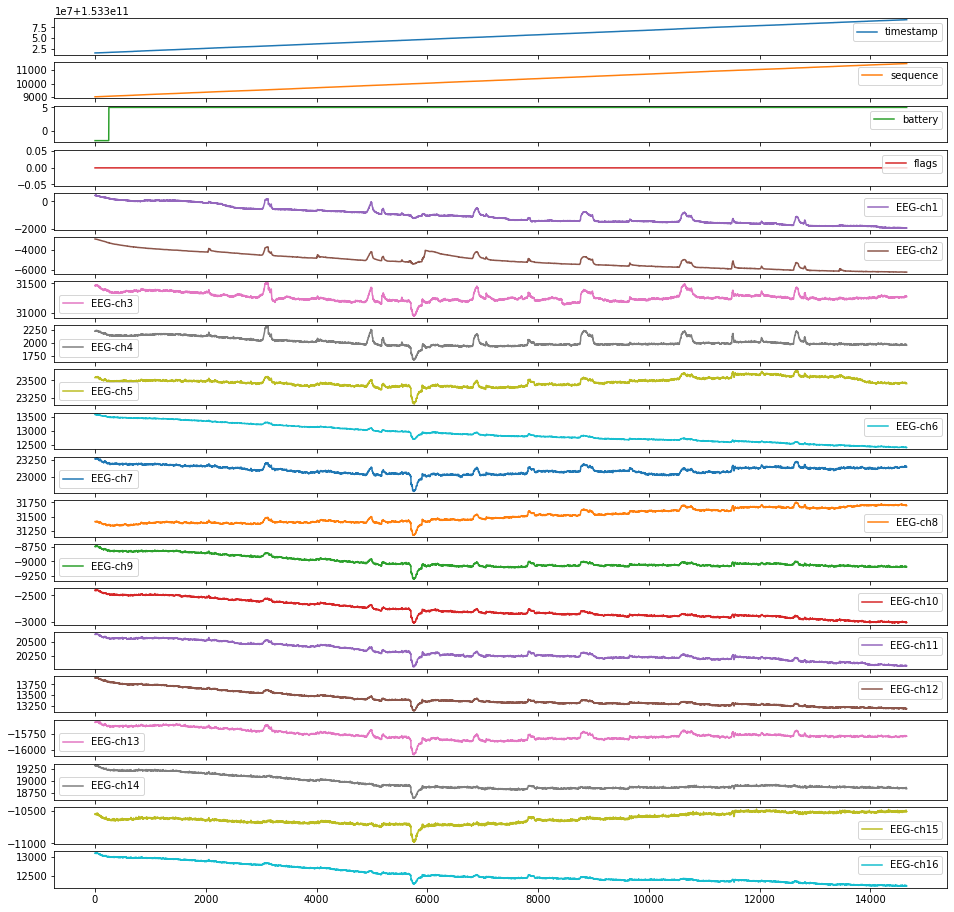

In [2]:
df.plot(subplots=True, figsize=(16, 16));

In [3]:
import bbtools as bbt

raw_rubert = bbt.read_csv(eeg_file,
                        ['Fp1', 'Fp2', 'F3', 'F4', 'C1', 'C3', 'C2', 'C4', 'CP1', 'CP3', 'CP2', 'CP4', 'Cz', 'O1', 'O2', 'Pz'])

Creating RawArray with float64 data, n_channels=16, n_times=14656
    Range : 0 ... 14655 =      0.000 ...    57.246 secs
Ready.


Effective window size : 8.000 (s)


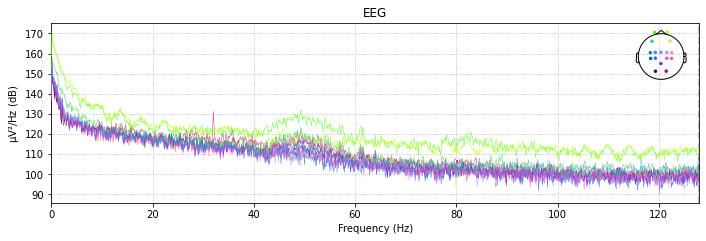

In [4]:
plot_raw = raw_rubert.plot_psd(fmin = 0, fmax = 128, average=False, tmin = 0, tmax = 120)
#plot_raw = raw_rubert.plot_psd(fmin = 0, fmax = 128, average=True, tmin = 0, tmax = 120)
#plot_raw = raw_rubert.plot_psd()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (6.605 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Effective window size : 8.000 (s)


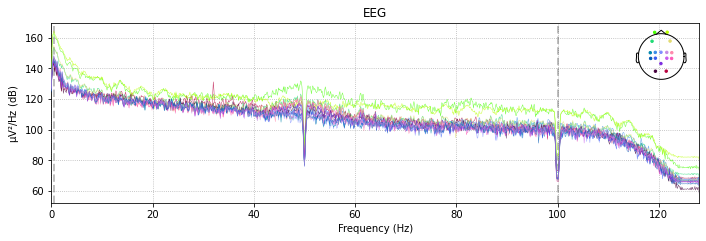

In [5]:
filtered_rubert = bbt.filters(raw_rubert)
plot_filtered = filtered_rubert.plot_psd(fmin = 0, fmax = 128, average=False, tmin = 0, tmax = 120)